# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("../datasets/tiktok_dataset.csv")
raw_data = pd.read_csv("../datasets/tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


==> ENTER YOUR RESPONSE HERE

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


Get the number of rows and columns in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [6]:
data["text_length"] = data["video_transcription_text"].apply(func=lambda text: len(str(text)))

In [7]:
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,3
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,3
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN,3
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN,3


In [8]:
data = data[['claim_status','verified_status',"author_ban_status","video_duration_sec","text_length",'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']]
data

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
19377,NaN,not verified,active,21,3,NaN,NaN,NaN,NaN,NaN
19378,NaN,not verified,active,53,3,NaN,NaN,NaN,NaN,NaN
19379,NaN,verified,under review,10,3,NaN,NaN,NaN,NaN,NaN
19380,NaN,not verified,active,24,3,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          19084 non-null  object 
 1   verified_status       19382 non-null  object 
 2   author_ban_status     19382 non-null  object 
 3   video_duration_sec    19382 non-null  int64  
 4   text_length           19382 non-null  int64  
 5   video_view_count      19084 non-null  float64
 6   video_like_count      19084 non-null  float64
 7   video_share_count     19084 non-null  float64
 8   video_download_count  19084 non-null  float64
 9   video_comment_count   19084 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [10]:
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          19084 non-null  object 
 1   verified_status       19084 non-null  object 
 2   author_ban_status     19084 non-null  object 
 3   video_duration_sec    19084 non-null  int64  
 4   text_length           19084 non-null  int64  
 5   video_view_count      19084 non-null  float64
 6   video_like_count      19084 non-null  float64
 7   video_share_count     19084 non-null  float64
 8   video_download_count  19084 non-null  float64
 9   video_comment_count   19084 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.6+ MB


Check for and handle duplicates.

In [11]:
data.duplicated().sum()

0

In [12]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          19084 non-null  object 
 1   verified_status       19084 non-null  object 
 2   author_ban_status     19084 non-null  object 
 3   video_duration_sec    19084 non-null  int64  
 4   text_length           19084 non-null  int64  
 5   video_view_count      19084 non-null  float64
 6   video_like_count      19084 non-null  float64
 7   video_share_count     19084 non-null  float64
 8   video_download_count  19084 non-null  float64
 9   video_comment_count   19084 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [13]:
data

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
19079,opinion,not verified,active,49,65,6067.0,423.0,81.0,8.0,2.0
19080,opinion,not verified,active,23,66,2973.0,820.0,70.0,3.0,0.0
19081,opinion,not verified,active,50,53,734.0,102.0,7.0,2.0,1.0
19082,opinion,not verified,active,8,80,3394.0,655.0,123.0,11.0,4.0


Check for and handle outliers.

<Axes: xlabel='text_length', ylabel='Count'>

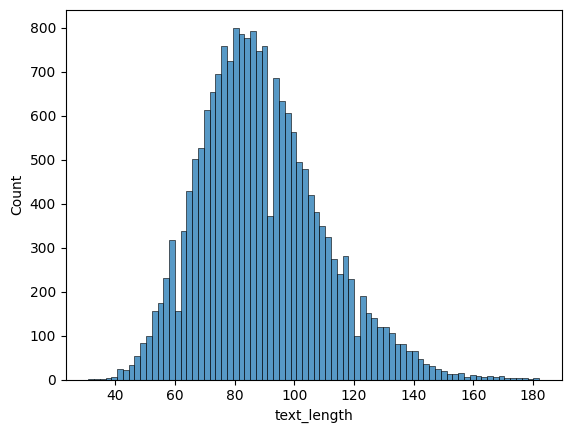

In [14]:
sns.histplot(data["text_length"])

<Axes: ylabel='video_view_count'>

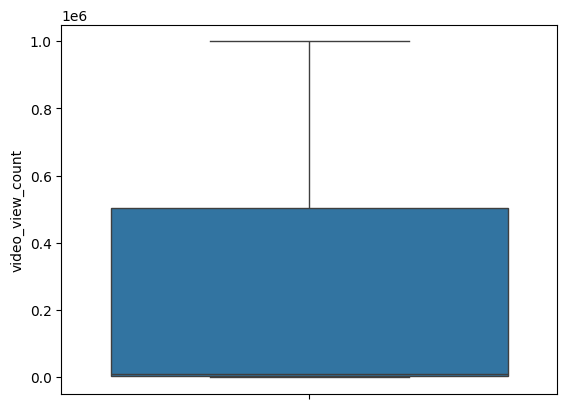

In [15]:
sns.boxplot(y=data["video_view_count"])

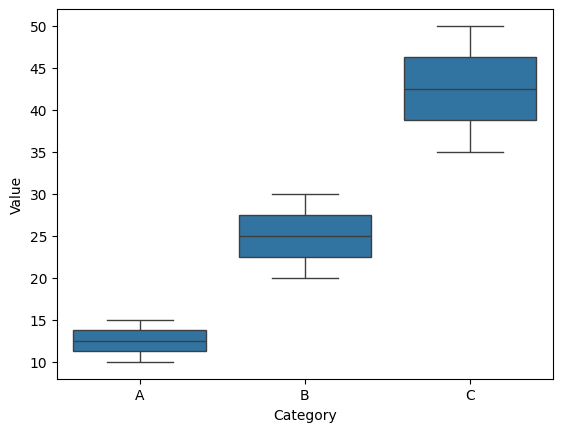

In [16]:
data2 = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
    'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50]
})

# Create a boxplot using Seaborn
sns.boxplot(x='Category', y='Value', data=data2)

# Show the plot
plt.show()

<Axes: >

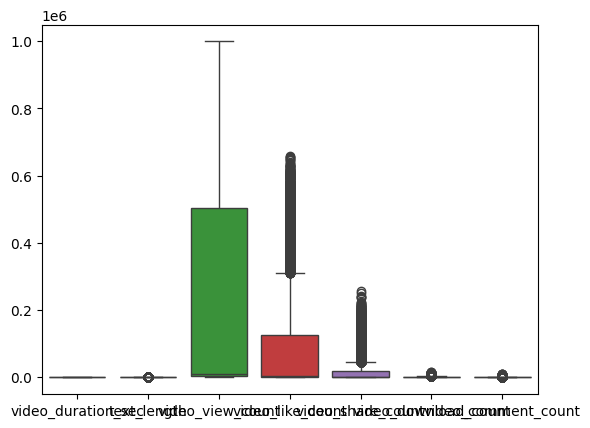

In [17]:
sns.boxplot(data)

In [18]:
rates = ["video_duration_sec","text_length", 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
claim_status = np.array(data["claim_status"].value_counts().index)
claim_status

array(['claim', 'opinion'], dtype=object)

<Axes: ylabel='text_length'>

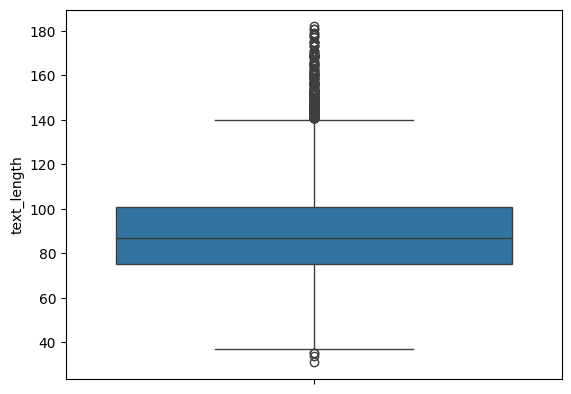

In [19]:
sns.boxplot(y=data["text_length"])

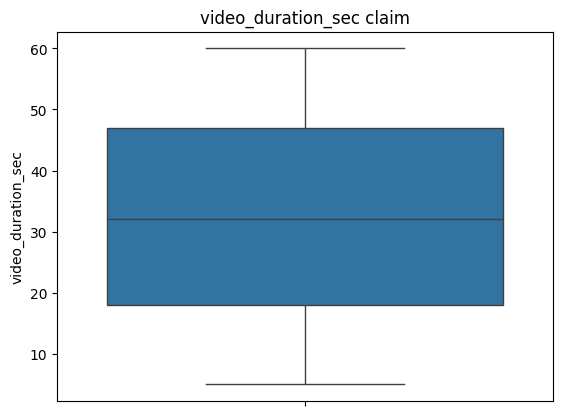

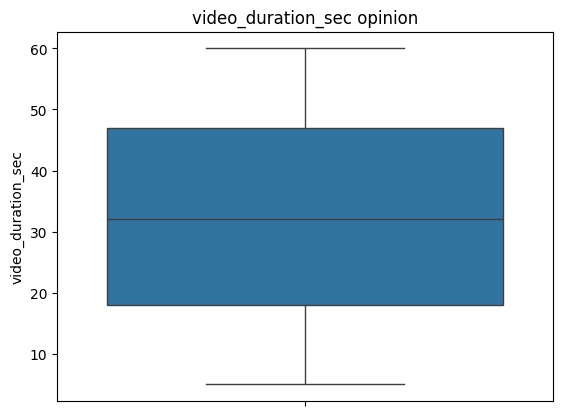

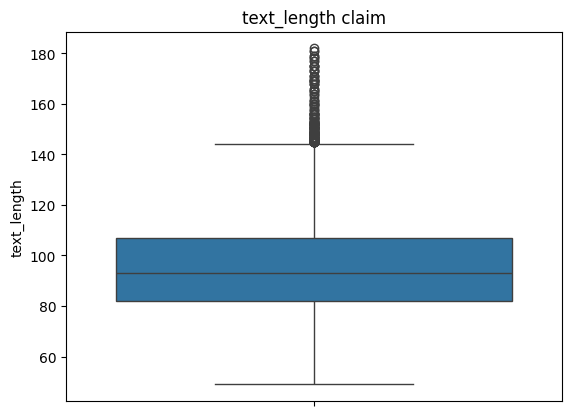

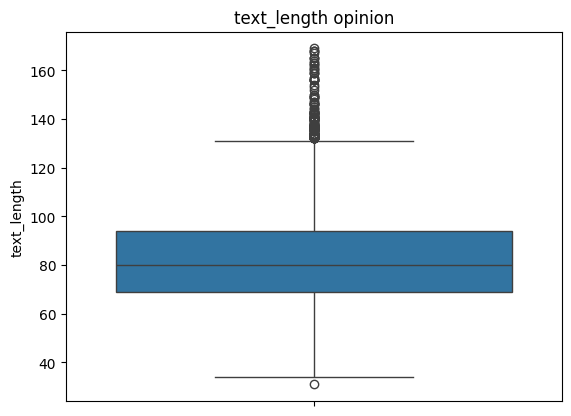

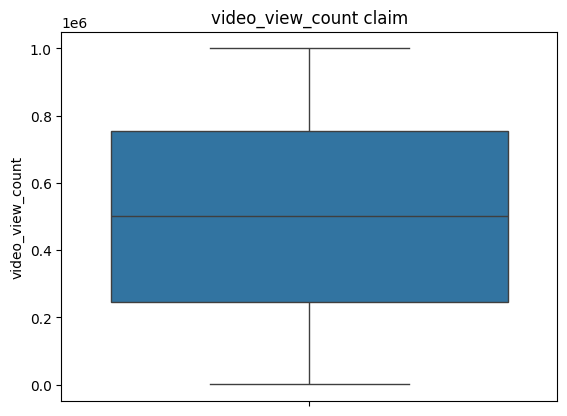

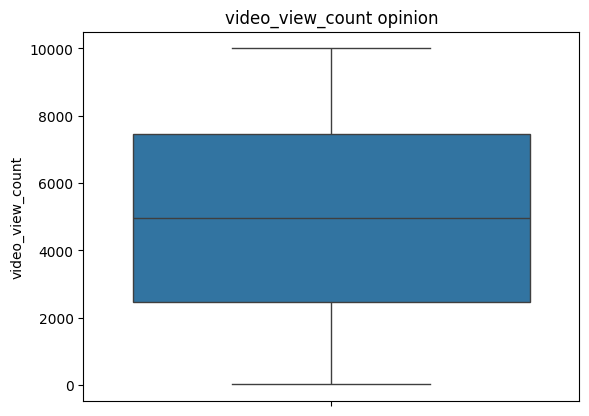

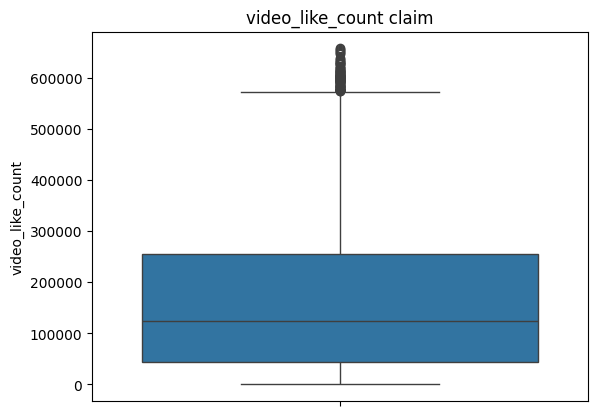

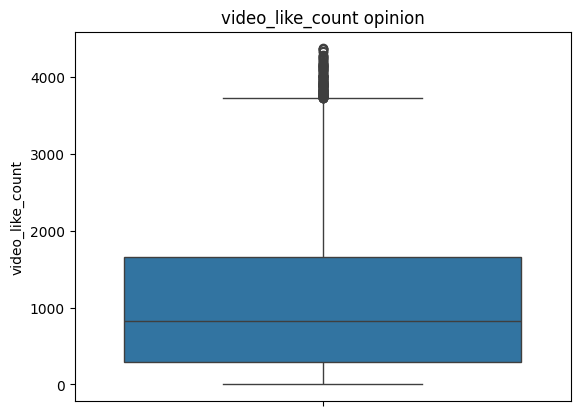

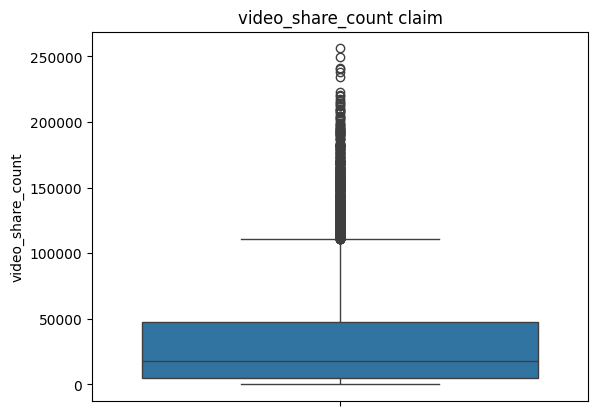

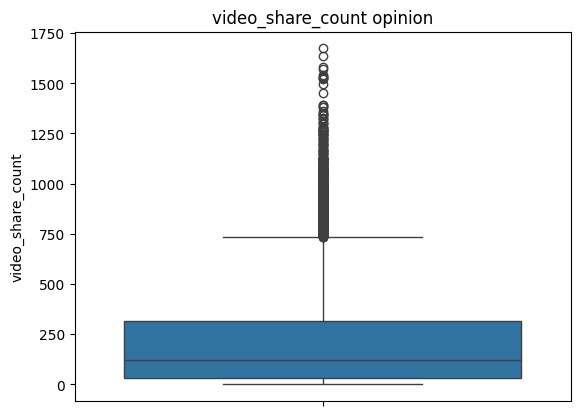

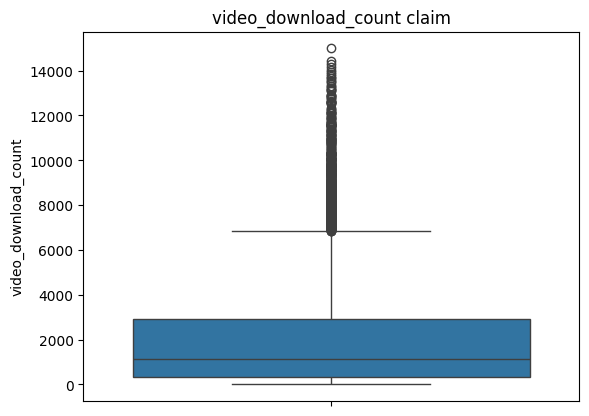

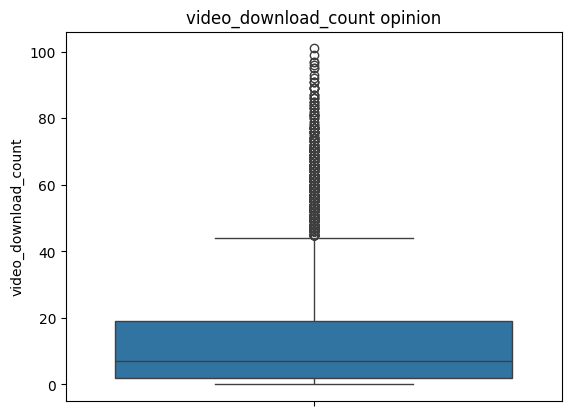

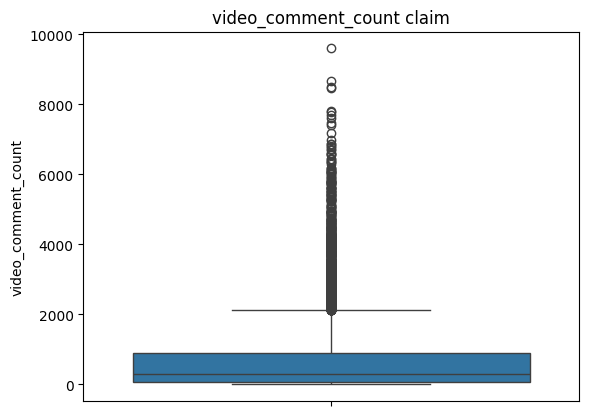

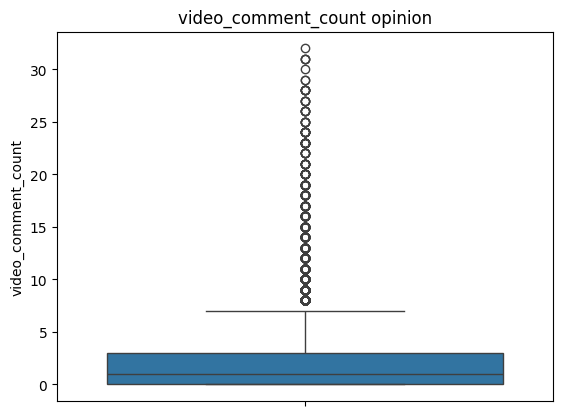

In [20]:
def plot_rates(data):
  for r in rates:
    for c in claim_status:  
      sns.boxplot(data=data[data["claim_status"]==c][r])
      plt.title(f"{r} {c}")
      plt.show()

plot_rates(data)


In [21]:
from scipy.stats import zscore

In [22]:
claim_data = data[data["claim_status"]=="claim"]

In [23]:
rates

['video_duration_sec',
 'text_length',
 'video_view_count',
 'video_like_count',
 'video_share_count',
 'video_download_count',
 'video_comment_count']

In [24]:
claim_data

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
9603,claim,not verified,active,49,83,737177.0,460743.0,54550.0,8119.0,3372.0
9604,claim,verified,active,9,123,546987.0,360080.0,79346.0,4537.0,2432.0
9605,claim,not verified,under review,27,95,885521.0,209475.0,44286.0,1210.0,794.0
9606,claim,not verified,active,27,132,356747.0,99394.0,21016.0,1163.0,497.0


In [25]:
claim_data

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
9603,claim,not verified,active,49,83,737177.0,460743.0,54550.0,8119.0,3372.0
9604,claim,verified,active,9,123,546987.0,360080.0,79346.0,4537.0,2432.0
9605,claim,not verified,under review,27,95,885521.0,209475.0,44286.0,1210.0,794.0
9606,claim,not verified,active,27,132,356747.0,99394.0,21016.0,1163.0,497.0


In [26]:
rates

['video_duration_sec',
 'text_length',
 'video_view_count',
 'video_like_count',
 'video_share_count',
 'video_download_count',
 'video_comment_count']

In [27]:
rates[-1]

'video_comment_count'

In [28]:
"""
When checikg for outlier of the entire dataset, the majority of claim-statused reports are considered as outliers, so I will delete 
all outliers of the 2 groups: data of claim-statused videos and data of opinion-statused videos.

wo = without outlier
scroll down
"""

'\nWhen checikg for outlier of the entire dataset, the majority of claim-statused reports are considered as outliers, so I will delete \nall outliers of the 2 groups: data of claim-statused videos and data of opinion-statused videos.\n\nwo = without outlier\nscroll down\n'

In [29]:
claim_data[rates].apply(lambda x : zscore(x)).head(7)

,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1.639489,0.082808,-0.541418,-0.995479,-0.845428,-0.853851,-0.679502
1,-0.030108,0.593018,-1.236218,-0.603041,-0.360818,-0.375353,-0.007044
2,-0.091944,2.123646,1.376961,-0.465285,-0.777944,-0.510653,-0.356054
3,-0.462966,1.817521,-0.218043,0.498461,0.046044,-0.345241,-0.105357
4,-0.833988,1.664458,-1.526984,-0.890057,-0.745659,-0.628627,-0.530067
5,0.155403,1.613437,-0.564240,0.062139,0.754947,0.916590,1.146163
6,-1.019498,-0.019234,0.855772,2.166563,4.148685,2.699817,4.674601


In [30]:
wo_mask = claim_data[rates].apply(lambda x:
                 (zscore(x)>-3) & (zscore(x)<3)).all(axis=1)

In [31]:
claim_data = claim_data[wo_mask]
claim_data

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
9603,claim,not verified,active,49,83,737177.0,460743.0,54550.0,8119.0,3372.0
9604,claim,verified,active,9,123,546987.0,360080.0,79346.0,4537.0,2432.0
9605,claim,not verified,under review,27,95,885521.0,209475.0,44286.0,1210.0,794.0
9606,claim,not verified,active,27,132,356747.0,99394.0,21016.0,1163.0,497.0


In [32]:
claim_data2 = data[data["claim_status"]=="claim"]
whis = 3.5
wo_mask2 = claim_data2[rates].apply(lambda x:
                 (x>(x.quantile(0.25)-whis*(x.quantile(0.75)-x.quantile(0.25)))) & (x<(x.quantile(0.75)+whis*(x.quantile(0.75)-x.quantile(0.25))))).all(axis=1)
claim_data2 = claim_data[wo_mask2]
claim_data2

C:\Users\mertf\AppData\Local\Temp\ipykernel_15644\391519678.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  claim_data2 = claim_data[wo_mask2]


,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
9603,claim,not verified,active,49,83,737177.0,460743.0,54550.0,8119.0,3372.0
9604,claim,verified,active,9,123,546987.0,360080.0,79346.0,4537.0,2432.0
9605,claim,not verified,under review,27,95,885521.0,209475.0,44286.0,1210.0,794.0
9606,claim,not verified,active,27,132,356747.0,99394.0,21016.0,1163.0,497.0


In [33]:
#sns.histplot(wo_data[wo_data["claim_status"]=="claim"]["video_like_count"])

C:\Users\mertf\AppData\Local\Temp\ipykernel_15644\1593591447.py:1: RuntimeWarning: divide by zero encountered in log
  testdata = data[data["claim_status"]=="claim"]["video_like_count"].apply(lambda x: np.log(np.log(x)))
C:\Users\mertf\AppData\Local\Temp\ipykernel_15644\1593591447.py:1: RuntimeWarning: invalid value encountered in log
  testdata = data[data["claim_status"]=="claim"]["video_like_count"].apply(lambda x: np.log(np.log(x)))


<Axes: xlabel='video_like_count', ylabel='Count'>

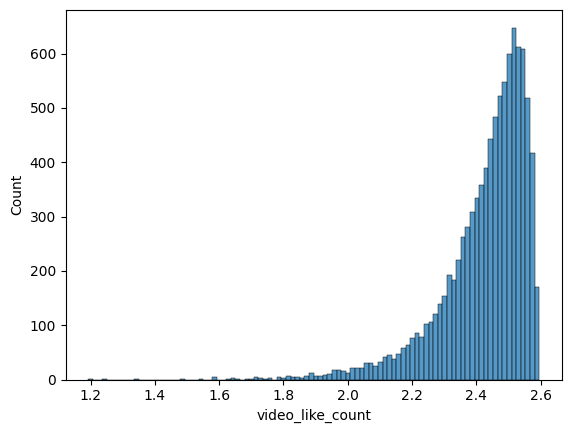

In [34]:
testdata = data[data["claim_status"]=="claim"]["video_like_count"].apply(lambda x: np.log(np.log(x)))
sns.histplot(testdata)

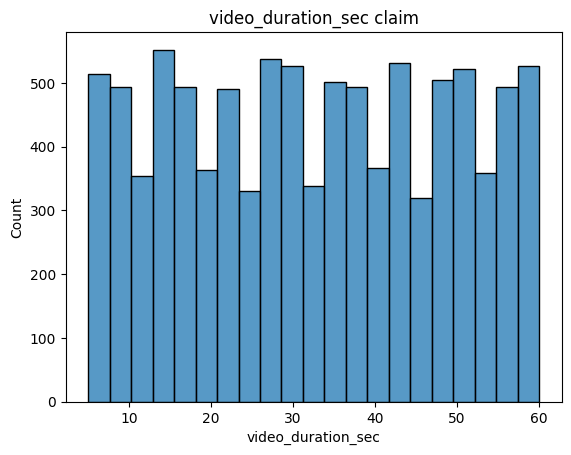

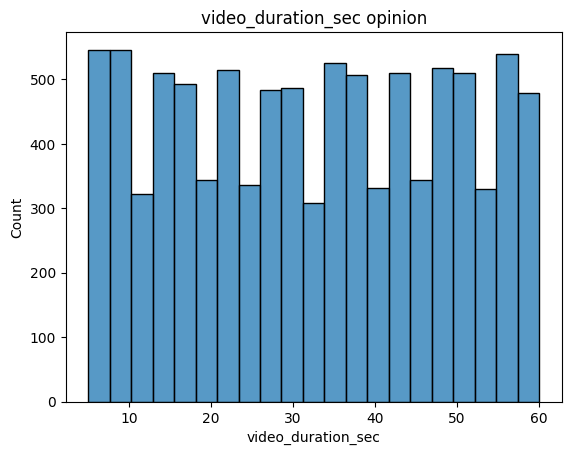

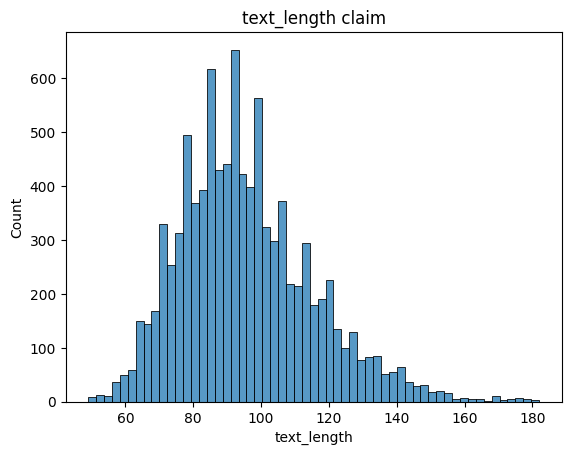

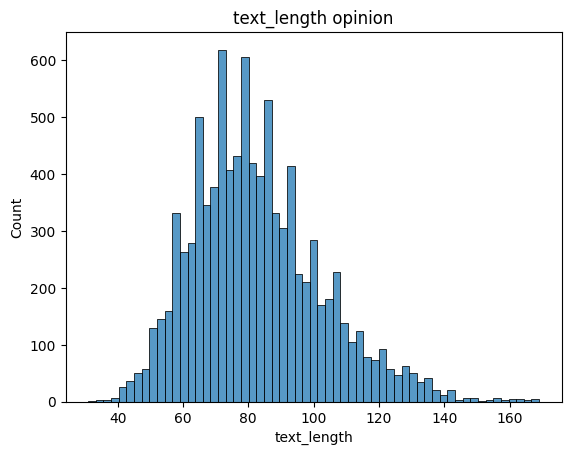

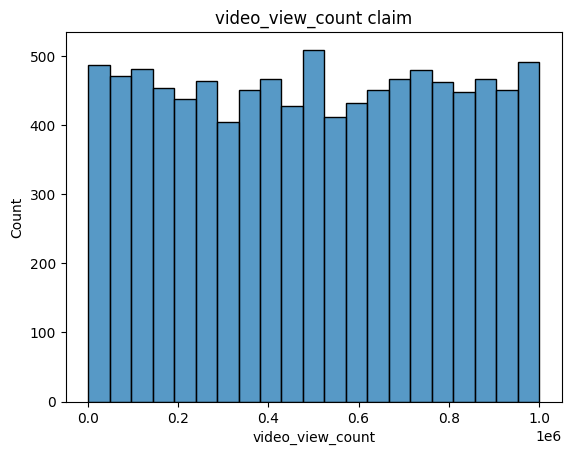

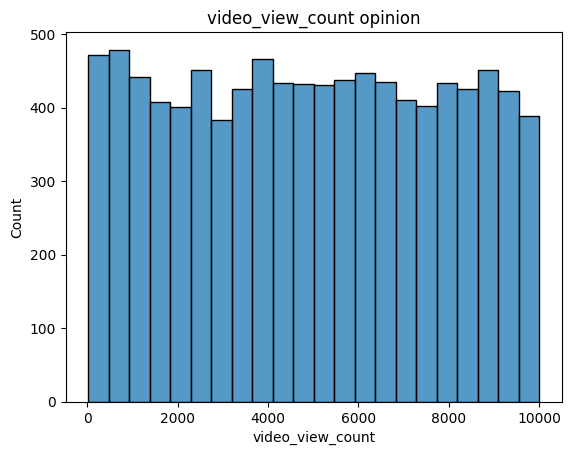

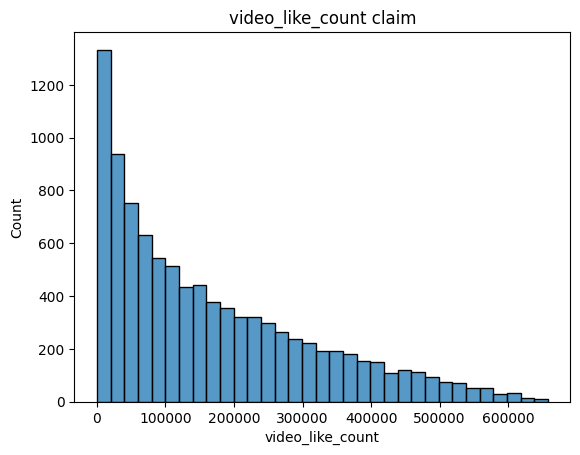

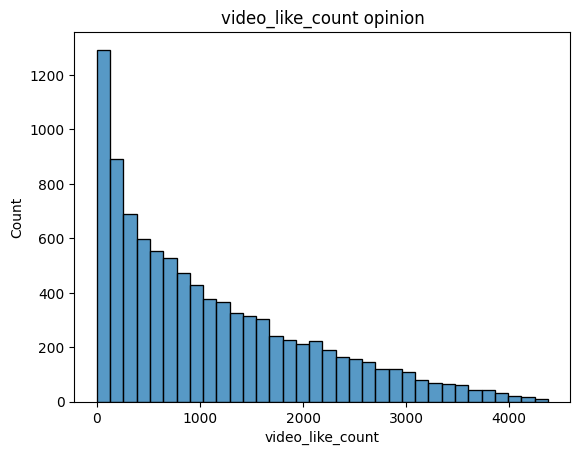

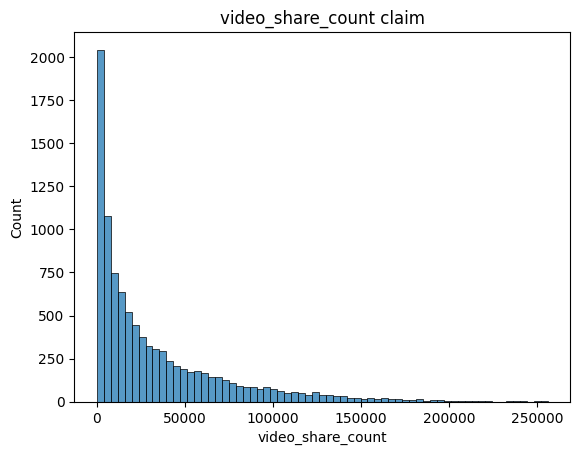

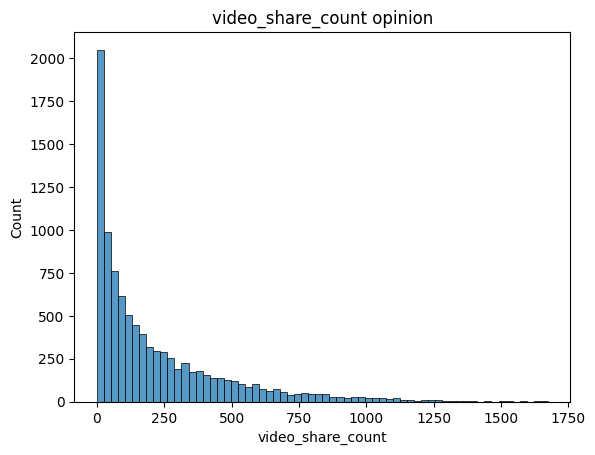

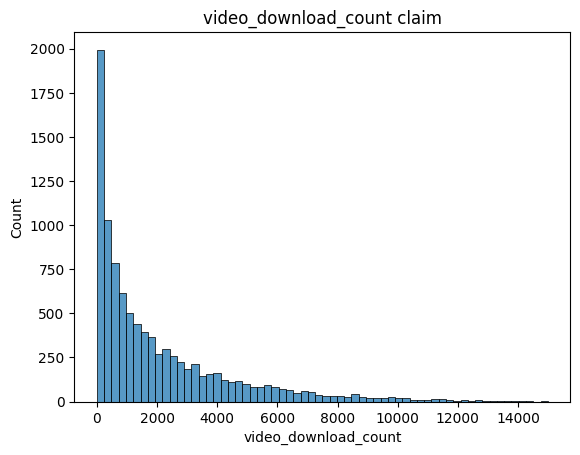

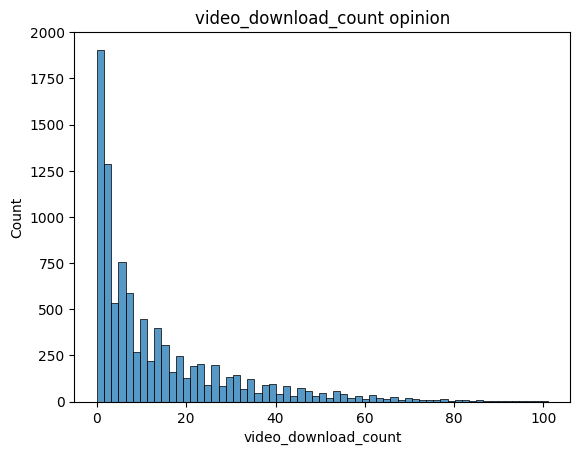

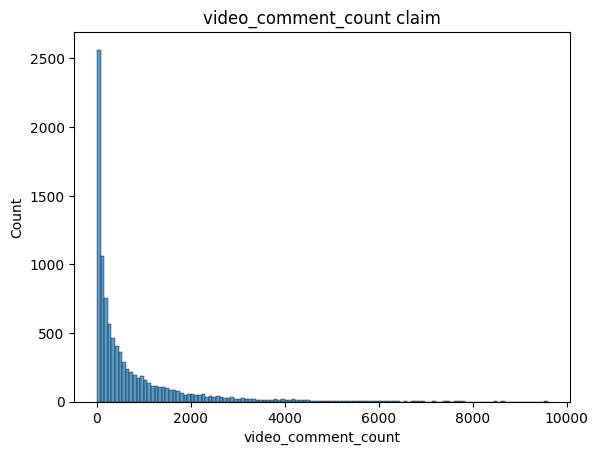

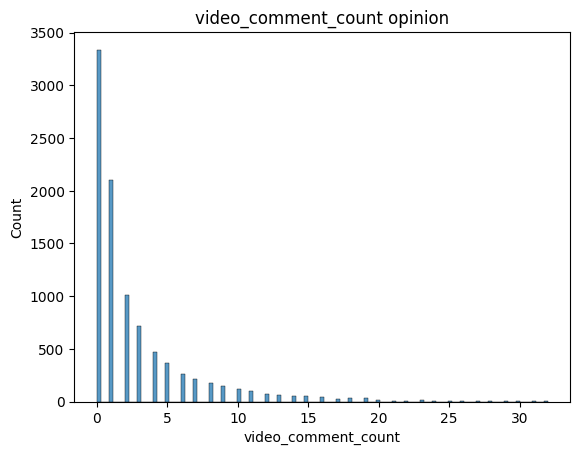

In [35]:
for r in rates:
    for c in claim_status:  
      sns.histplot(data=data[data["claim_status"]==c][r])
      plt.title(f"{r} {c}")
      plt.show()

In [36]:
zscore(claim_data["video_comment_count"])

0      -0.778118
1       0.175203
2      -0.319576
3       0.035829
4      -0.566269
          ...   
9603    3.921590
9604    2.611470
9605    0.328515
9606   -0.085427
9607   -0.518882
Name: video_comment_count, Length: 9070, dtype: float64

In [37]:
claim_data[claim_data["video_comment_count"] > 557+3*716]

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
30,claim,not verified,active,55,74,573518.0,324003.0,125931.0,4737.0,2918.0
55,claim,not verified,active,39,74,578064.0,269616.0,66922.0,6075.0,3321.0
112,claim,not verified,under review,11,113,660561.0,322446.0,120347.0,5519.0,3449.0
120,claim,not verified,active,53,89,812513.0,523168.0,20023.0,7565.0,2809.0
166,claim,not verified,banned,17,88,734203.0,296340.0,112802.0,6795.0,2745.0
...,...,...,...,...,...,...,...,...,...,...
9474,claim,not verified,active,28,103,629139.0,203388.0,21868.0,4217.0,2764.0
9512,claim,not verified,active,41,92,385458.0,241815.0,11766.0,6038.0,3126.0
9534,claim,not verified,active,5,98,934341.0,330310.0,130813.0,7392.0,3408.0
9537,claim,not verified,active,7,128,963400.0,295977.0,67247.0,5810.0,3556.0


In [38]:
claim_data["video_comment_count"].std(),claim_data["video_comment_count"].mean()

(717.5308072196732, 558.2931642778391)

In [39]:

#
#wo_data_claim = claim_data[wo_mask]
#zscore(wo_data_claim[rates]).describe()
wo_mask

0       True
1       True
2       True
3       True
4       True
        ... 
9603    True
9604    True
9605    True
9606    True
9607    True
Length: 9608, dtype: bool

Check class balance.

In [40]:
# Check class balance for video_comment_count
### YOUR CODE HERE ###


In [41]:
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

In [42]:
"""
Delete all outliers that are more than 3 std away from the mean of reports with claims and opinions, respectively,
by using scipy.stats.zscore
"""

'\nDelete all outliers that are more than 3 std away from the mean of reports with claims and opinions, respectively,\nby using scipy.stats.zscore\n'

In [43]:
rates, claim_status

(['video_duration_sec',
  'text_length',
  'video_view_count',
  'video_like_count',
  'video_share_count',
  'video_download_count',
  'video_comment_count'],
 array(['claim', 'opinion'], dtype=object))

In [44]:
wo_data = data[( (zscore(data[rates]) < 3) & (zscore(data[rates]) > -3) ).all(axis=1)]#.reset_index(drop=True)
wo_data

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
19079,opinion,not verified,active,49,65,6067.0,423.0,81.0,8.0,2.0
19080,opinion,not verified,active,23,66,2973.0,820.0,70.0,3.0,0.0
19081,opinion,not verified,active,50,53,734.0,102.0,7.0,2.0,1.0
19082,opinion,not verified,active,8,80,3394.0,655.0,123.0,11.0,4.0


In [45]:
# export dataset without outlier
wo_data.to_csv("../datasets/tiktok_dataset_without_outlier.csv")

In [93]:
wo_data

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
19079,opinion,not verified,active,49,65,6067.0,423.0,81.0,8.0,2.0
19080,opinion,not verified,active,23,66,2973.0,820.0,70.0,3.0,0.0
19081,opinion,not verified,active,50,53,734.0,102.0,7.0,2.0,1.0
19082,opinion,not verified,active,8,80,3394.0,655.0,123.0,11.0,4.0


<Axes: xlabel='video_like_count', ylabel='Count'>

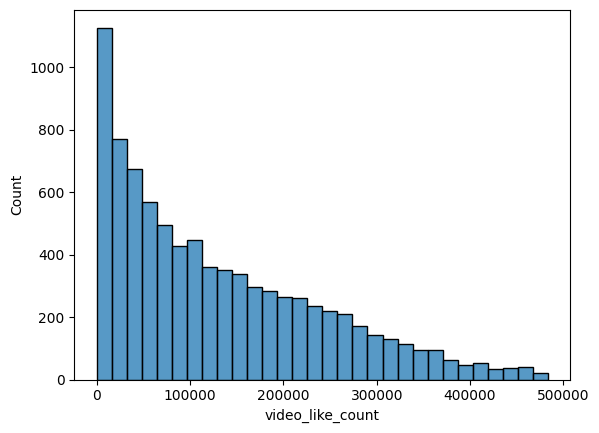

In [46]:
sns.histplot(wo_data[wo_data["claim_status"]=="claim"]["video_like_count"])

C:\Users\mertf\AppData\Local\Temp\ipykernel_15644\1571567270.py:1: RuntimeWarning: divide by zero encountered in log
  sns.histplot(wo_data[wo_data["claim_status"]=="claim"]["video_like_count"].apply(lambda x: np.log(x)))


<Axes: xlabel='video_like_count', ylabel='Count'>

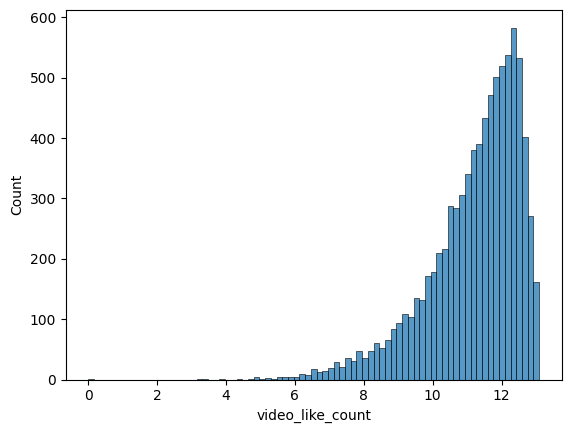

In [47]:
sns.histplot(wo_data[wo_data["claim_status"]=="claim"]["video_like_count"].apply(lambda x: np.log(x)))

In [48]:
print(f"{data.shape[0] - wo_data.shape[0]} reports are considered as outliers")

1263 reports are considered as outliers


Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

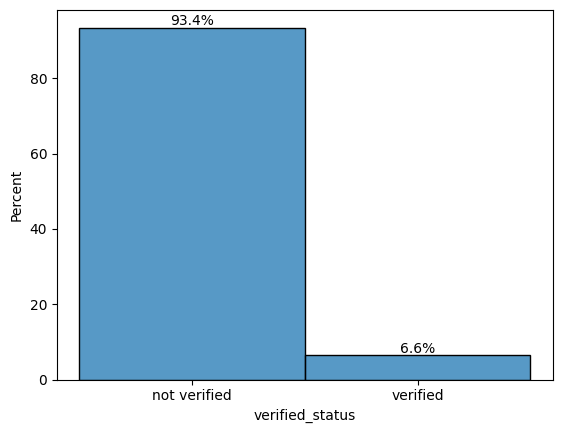

In [49]:
ax = sns.histplot(data=wo_data, x="verified_status", stat="percent")

for p in ax.patches:
  ax.annotate(f'{round(p.get_height(),1)}%', (p.get_x() + p.get_width() / 2., p.get_height()-2),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Use resampling to create class balance in the outcome variable, if needed.

In [50]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
### YOUR CODE HERE ###

# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###

# Combine majority class with upsampled minority class
### YOUR CODE HERE ###

# Display new class counts
### YOUR CODE HERE ###

In [51]:
pd.concat([data])

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
19079,opinion,not verified,active,49,65,6067.0,423.0,81.0,8.0,2.0
19080,opinion,not verified,active,23,66,2973.0,820.0,70.0,3.0,0.0
19081,opinion,not verified,active,50,53,734.0,102.0,7.0,2.0,1.0
19082,opinion,not verified,active,8,80,3394.0,655.0,123.0,11.0,4.0


In [52]:
3//2

1

In [53]:
#upsample verified class(~1k) to the count of not verified class(~18k) to get balanced classes of the outcome variable

n1 = wo_data[wo_data["verified_status"]=="not verified"].shape[0] # sample size
n2 = wo_data[wo_data["verified_status"]=="verified"].shape[0] # sample size
upsample_size = n1//n2
minority_class = pd.concat([wo_data[wo_data["verified_status"]=="verified"]] * upsample_size, axis=0)
resampled_wo_data = pd.concat([wo_data[wo_data["verified_status"]=="not verified"] ,
                              minority_class],axis=0)
resampled_wo_data = resampled_wo_data.sample(frac=1) #shuffled data entries, so DataFrame is not chronologically split into verified and not verified 
resampled_wo_data["verified_status"].value_counts()

verified_status
not verified    16651
verified        16380
Name: count, dtype: int64

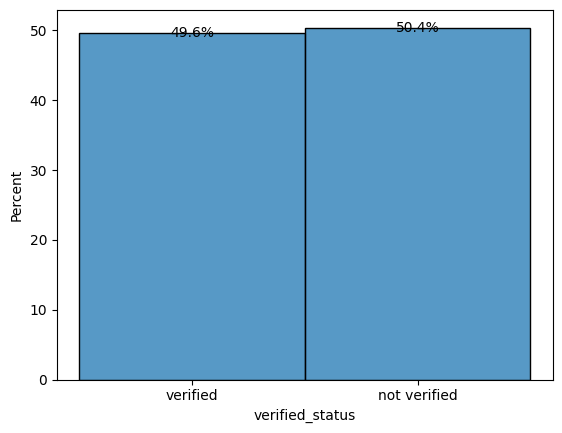

In [54]:
ax = sns.histplot(data=resampled_wo_data, x="verified_status", stat="percent")

for p in ax.patches:
  ax.annotate(f'{round(p.get_height(),1)}%', (p.get_x() + p.get_width() / 2., p.get_height()-2),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [55]:
resampled_wo_data.groupby(["verified_status"])["text_length"].mean()

verified_status
not verified    88.555943
verified        83.956410
Name: text_length, dtype: float64

Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

<Axes: xlabel='text_length', ylabel='Count'>

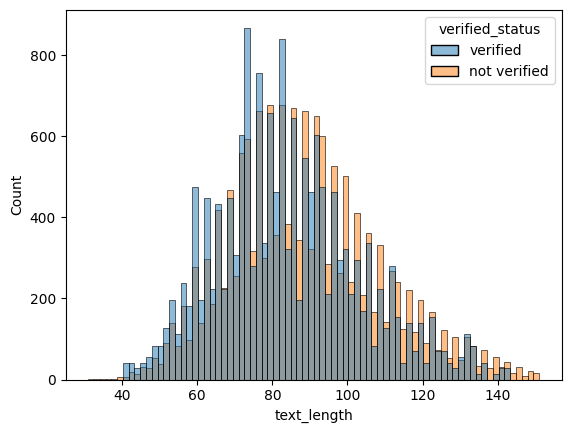

In [56]:
sns.histplot(x=resampled_wo_data["text_length"],hue=resampled_wo_data["verified_status"])


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [57]:
corr_table = resampled_wo_data.corr(numeric_only=True)[(resampled_wo_data.corr(numeric_only=True) < 0.7) | (resampled_wo_data.corr(numeric_only=True)==1)]
#corr_table = corr_table.isna().any(axis=1)
corr_table

,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
video_duration_sec,1.000000,-0.003164,0.013087,0.007308,0.007307,0.012704,0.005142
text_length,-0.003164,1.000000,0.235819,0.198412,0.165939,0.179070,0.163211
video_view_count,0.013087,0.235819,1.000000,NaN,0.697586,0.683053,0.602006
video_like_count,0.007308,0.198412,NaN,1.000000,NaN,NaN,0.697745
video_share_count,0.007307,0.165939,0.697586,NaN,1.000000,0.694176,0.611113
video_download_count,0.012704,0.179070,0.683053,NaN,0.694176,1.000000,NaN
video_comment_count,0.005142,0.163211,0.602006,0.697745,0.611113,NaN,1.000000


Visualize a correlation heatmap of the data.

<Axes: >

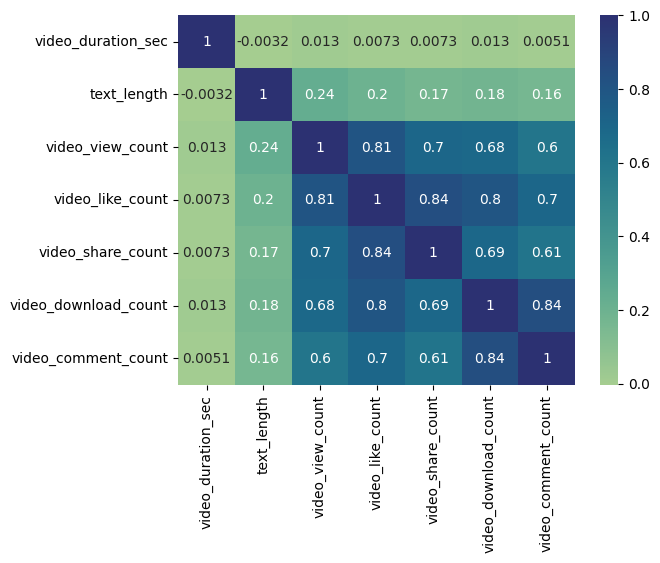

In [58]:
sns.heatmap(data=resampled_wo_data.corr(numeric_only=True), annot=True, cmap="crest")


In [59]:
resampled_wo_data[["video_duration_sec","text_length","video_view_count","video_comment_count"]].corr()

,video_duration_sec,text_length,video_view_count,video_comment_count
video_duration_sec,1.000000,-0.003164,0.013087,0.005142
text_length,-0.003164,1.000000,0.235819,0.163211
video_view_count,0.013087,0.235819,1.000000,0.602006
video_comment_count,0.005142,0.163211,0.602006,1.000000


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?["text_length","video_view_count","video_comment_count"]

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

In [60]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn import metrics

Set your Y and X variables.

Select the outcome variable.

In [61]:
resampled_wo_data

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
15097,opinion,verified,active,36,118,4445.0,605.0,80.0,13.0,4.0
979,claim,not verified,active,44,112,678492.0,277066.0,63649.0,808.0,528.0
12850,opinion,verified,under review,5,76,6051.0,1212.0,58.0,0.0,0.0
6407,claim,not verified,active,32,118,981618.0,231772.0,36179.0,4109.0,2043.0
19051,opinion,not verified,active,34,72,6504.0,2186.0,237.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18952,opinion,verified,active,28,89,7139.0,1652.0,410.0,32.0,2.0
14946,opinion,verified,active,51,90,4294.0,1592.0,286.0,23.0,0.0
19021,opinion,verified,active,41,50,2118.0,465.0,57.0,5.0,2.0
13450,opinion,verified,active,29,69,9878.0,1213.0,442.0,27.0,1.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

Confirm that the dimensions of the training and testing sets are in alignment.

### **Task 3c. Encode variables**

Check the data types of the features.

In [62]:
resampled_wo_data["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [63]:
resampled_wo_data["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [64]:
data_to_encode = resampled_wo_data[["verified_status","claim_status","author_ban_status"]]

In [65]:
data_to_encode[:10]

,verified_status,claim_status,author_ban_status
15097,verified,opinion,active
979,not verified,claim,active
12850,verified,opinion,under review
6407,not verified,claim,active
19051,not verified,opinion,active
9731,not verified,opinion,under review
8779,not verified,claim,active
5449,verified,claim,active
9817,verified,opinion,active
9404,verified,claim,active


In [66]:
encoder = OneHotEncoder(drop="first", sparse_output=False)#.fit_transform(data_to_encode)
encoded_data = encoder.fit_transform(data_to_encode)
encoded_data

array([[1., 1., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 0., 1.],
       ...,
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 0., 0.]])

In [67]:
encoder.get_feature_names_out()

array(['verified_status_verified', 'claim_status_opinion',
       'author_ban_status_banned', 'author_ban_status_under review'],
      dtype=object)

In [68]:
encoded_data_df = pd.DataFrame(data=encoded_data, columns=encoder.get_feature_names_out())
encoded_data_df

,verified_status_verified,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
33026,1.0,1.0,0.0,0.0
33027,1.0,1.0,0.0,0.0
33028,1.0,1.0,0.0,0.0
33029,1.0,1.0,0.0,0.0


In [69]:
resampled_wo_data = resampled_wo_data.drop(columns=["claim_status", "verified_status", "author_ban_status"	])

In [70]:
resampled_wo_data = pd.concat([resampled_wo_data.reset_index(drop=True),encoded_data_df],axis=1)
resampled_wo_data

,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_verified,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,36,118,4445.0,605.0,80.0,13.0,4.0,1.0,1.0,0.0,0.0
1,44,112,678492.0,277066.0,63649.0,808.0,528.0,0.0,0.0,0.0,0.0
2,5,76,6051.0,1212.0,58.0,0.0,0.0,1.0,1.0,0.0,1.0
3,32,118,981618.0,231772.0,36179.0,4109.0,2043.0,0.0,0.0,0.0,0.0
4,34,72,6504.0,2186.0,237.0,4.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
33026,28,89,7139.0,1652.0,410.0,32.0,2.0,1.0,1.0,0.0,0.0
33027,51,90,4294.0,1592.0,286.0,23.0,0.0,1.0,1.0,0.0,0.0
33028,41,50,2118.0,465.0,57.0,5.0,2.0,1.0,1.0,0.0,0.0
33029,29,69,9878.0,1213.0,442.0,27.0,1.0,1.0,1.0,0.0,0.0


In [71]:
resampled_wo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33031 entries, 0 to 33030
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   video_duration_sec              33031 non-null  int64  
 1   text_length                     33031 non-null  int64  
 2   video_view_count                33031 non-null  float64
 3   video_like_count                33031 non-null  float64
 4   video_share_count               33031 non-null  float64
 5   video_download_count            33031 non-null  float64
 6   video_comment_count             33031 non-null  float64
 7   verified_status_verified        33031 non-null  float64
 8   claim_status_opinion            33031 non-null  float64
 9   author_ban_status_banned        33031 non-null  float64
 10  author_ban_status_under review  33031 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.8 MB


In [72]:
resampled_wo_data = resampled_wo_data.rename(columns={"verified_status_verified":"verified_status",
                                  "claim_status_opinion":"claim_status",
                                  "author_ban_status_banned":"author_ban_status_banned",
                                  "author_ban_status_under review":"author_ban_status_under_review"})

In [73]:
y = resampled_wo_data[["verified_status"]]
features = ["claim_status","author_ban_status_banned","author_ban_status_under_review","video_duration_sec","text_length",
            "video_view_count","video_comment_count"]
X = resampled_wo_data[features]
X

,claim_status,author_ban_status_banned,author_ban_status_under_review,video_duration_sec,text_length,video_view_count,video_comment_count
0,1.0,0.0,0.0,36,118,4445.0,4.0
1,0.0,0.0,0.0,44,112,678492.0,528.0
2,1.0,0.0,1.0,5,76,6051.0,0.0
3,0.0,0.0,0.0,32,118,981618.0,2043.0
4,1.0,0.0,0.0,34,72,6504.0,0.0
...,...,...,...,...,...,...,...
33026,1.0,0.0,0.0,28,89,7139.0,2.0
33027,1.0,0.0,0.0,51,90,4294.0,0.0
33028,1.0,0.0,0.0,41,50,2118.0,2.0
33029,1.0,0.0,0.0,29,69,9878.0,1.0


In [74]:
y

,verified_status
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
33026,1.0
33027,1.0
33028,1.0
33029,1.0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23121, 7), (9910, 7), (23121, 1), (9910, 1))

In [77]:
X_test

,claim_status,author_ban_status_banned,author_ban_status_under_review,video_duration_sec,text_length,video_view_count,video_comment_count
14987,0.0,0.0,0.0,39,83,758131.0,143.0
14033,1.0,0.0,0.0,30,54,5569.0,4.0
16026,1.0,0.0,0.0,7,66,2780.0,1.0
8576,1.0,0.0,0.0,18,87,7817.0,5.0
30297,0.0,0.0,0.0,47,115,868555.0,59.0
...,...,...,...,...,...,...,...
12887,1.0,0.0,0.0,12,68,5566.0,3.0
24536,0.0,0.0,0.0,39,70,693525.0,3.0
23691,1.0,0.0,0.0,21,85,6201.0,10.0
11537,0.0,1.0,0.0,44,83,32144.0,0.0


Check the data type of the outcome variable.

In [78]:
resampled_wo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33031 entries, 0 to 33030
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   video_duration_sec              33031 non-null  int64  
 1   text_length                     33031 non-null  int64  
 2   video_view_count                33031 non-null  float64
 3   video_like_count                33031 non-null  float64
 4   video_share_count               33031 non-null  float64
 5   video_download_count            33031 non-null  float64
 6   video_comment_count             33031 non-null  float64
 7   verified_status                 33031 non-null  float64
 8   claim_status                    33031 non-null  float64
 9   author_ban_status_banned        33031 non-null  float64
 10  author_ban_status_under_review  33031 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.8 MB


### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [79]:
model = LogisticRegression().fit(X_train,y_train)

c:\Users\mertf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [80]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = model.predict(X_test) 
y_pred

array([0., 1., 1., ..., 1., 1., 1.])

Display the predictions on the encoded testing set.

In [81]:
y_test

,verified_status
14987,0.0
14033,0.0
16026,1.0
8576,1.0
30297,0.0
...,...
12887,1.0
24536,0.0
23691,1.0
11537,0.0


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

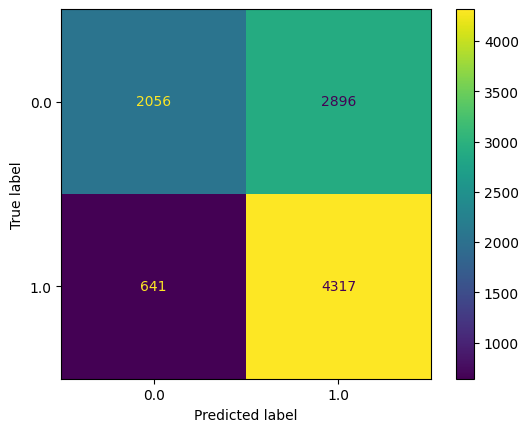

In [82]:
cm = metrics.confusion_matrix(y_test, y_pred, labels= model.classes_)

disp = metrics.ConfusionMatrixDisplay(cm, display_labels= model.classes_)

disp.plot()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [83]:
metrics.precision_score(y_test,y_pred)

0.5985027034521003

In [84]:
for s in ["precision", "recall", "f1", "accuracy"]:
  print(f"{s}:{getattr(metrics,s+'_score')(y_test,y_pred)}")

precision:0.5985027034521003
recall:0.8707139975796693
f1:0.7093911757456248
accuracy:0.643087790110999


### **Task 4c. Interpret model coefficients**

In [85]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###


In [86]:
feature_names = model.feature_names_in_
model_coefficients = model.coef_[0]
model_coefficients

array([ 5.54723657e-05, -3.25366921e-06, -2.79899946e-06,  1.16912848e-03,
        2.87619937e-03, -2.14823766e-06, -2.84292056e-04])

In [87]:
pd.DataFrame(data={"features":feature_names, "model coefficient":model_coefficients})

,features,model coefficient
0,claim_status,0.000055
1,author_ban_status_banned,-0.000003
2,author_ban_status_under_review,-0.000003
3,video_duration_sec,0.001169
4,text_length,0.002876
5,video_view_count,-0.000002
6,video_comment_count,-0.000284


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 

In [88]:
X

,claim_status,author_ban_status_banned,author_ban_status_under_review,video_duration_sec,text_length,video_view_count,video_comment_count
0,1.0,0.0,0.0,36,118,4445.0,4.0
1,0.0,0.0,0.0,44,112,678492.0,528.0
2,1.0,0.0,1.0,5,76,6051.0,0.0
3,0.0,0.0,0.0,32,118,981618.0,2043.0
4,1.0,0.0,0.0,34,72,6504.0,0.0
...,...,...,...,...,...,...,...
33026,1.0,0.0,0.0,28,89,7139.0,2.0
33027,1.0,0.0,0.0,51,90,4294.0,0.0
33028,1.0,0.0,0.0,41,50,2118.0,2.0
33029,1.0,0.0,0.0,29,69,9878.0,1.0


In [89]:
pd.DataFrame(data={"features":feature_names, "model coefficient":model_coefficients})

,features,model coefficient
0,claim_status,0.000055
1,author_ban_status_banned,-0.000003
2,author_ban_status_under_review,-0.000003
3,video_duration_sec,0.001169
4,text_length,0.002876
5,video_view_count,-0.000002
6,video_comment_count,-0.000284


In [90]:
#for x in X.columns:
#  sns.regplot(x=X[x], y=y, logistic=True)
#  plt.show()

In [91]:
y

,verified_status
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
33026,1.0
33027,1.0
33028,1.0
33029,1.0


In [92]:
encoder.get_feature_names_out()

array(['verified_status_verified', 'claim_status_opinion',
       'author_ban_status_banned', 'author_ban_status_under review'],
      dtype=object)